# Aroon Indicator Backtest

## *Strategy Rules*
### - Buy whenever the Aroon Oscilator turns positive by surpassing the zero limit
### - Sell whenever the Aroon Oscilator turns negative by breaking the zero line
### - Only sell if you have stocks in possession
### - Buy the maximum stocks that you can ( with the strategy money)

In [2506]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import math
plt.style.use('ggplot')

                                   Stock Data

In [2507]:
df=yf.download("PETR4.SA",start="2017-01-01",progress=False) # eem, xle
df.head(55)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,14.640000,14.700000,14.600000,14.660000,13.157299,7525700
2017-01-03,14.950000,15.650000,14.950000,15.500000,13.911197,39947800
2017-01-04,15.450000,15.680000,15.310000,15.500000,13.911197,37071700
2017-01-05,15.700000,15.910000,15.620000,15.750000,14.135570,47586300
2017-01-06,15.780000,15.920000,15.500000,15.660000,14.054795,25592000
2017-01-09,15.500000,15.600000,15.330000,15.330000,13.758621,25599000
2017-01-10,15.600000,15.680000,15.390000,15.480000,13.893247,26239900
2017-01-11,15.640000,15.680000,15.270000,15.660000,14.054795,34399300
2017-01-12,16.150000,16.250000,15.900000,15.900000,14.270196,49890300


# Creating the Aroon Indicator

In [2508]:
date=df.index.to_list()
highp=df["High"].to_list() # converter tudo pra lista facilita as coisas
lowp=df["Low"].to_list()
tf=25# 25 days to analyse
AroonUp=[] 
AroonDown=[]
AroonDate=[]
x=tf # ele temque comecar no ponto 25 (vulgo ignora-se os 25 primeiros dados)
while x<len(date): # ele vai do ponto 25 até o tamanho máximo da lista
    Aroon_up=((highp[x-tf:x].index(max(highp[x-tf:x])))/float(tf))*100 # ele pega tf periodos anteriores e olha até o ponto atual da análise, buscando o indice que está o ponto máximo dentre as máximas do ativo 
    Aroon_down=((lowp[x-tf:x].index(min(lowp[x-tf:x])))/float(tf))*100# ele pega tf periodos anteriores e olha até o ponto atual da análise, buscando o indice que está o ponto minimo dentre o low do ativo
    AroonUp.append(Aroon_up) 
    AroonDown.append(Aroon_down) 
    AroonDate.append(date[x])
    x+=1
df_teste=pd.DataFrame()
AroonDown=pd.Series(AroonDown)
df_teste["Aroon_Down"]=AroonDown
AroonUp=pd.Series(AroonUp)
df_teste["Aroon_Up"]=AroonUp
AroonDate=pd.Series(AroonDate)
df_teste["Aroon_Date"]=AroonDate
df_teste=df_teste.set_index("Aroon_Date")
df_teste.tail(40)


,Aroon_Down,Aroon_Up
Aroon_Date,,
2021-06-04,12.0,96.0
2021-06-07,8.0,96.0
2021-06-08,4.0,92.0
2021-06-09,0.0,96.0
2021-06-10,0.0,96.0
2021-06-11,0.0,92.0
2021-06-14,0.0,88.0
2021-06-15,4.0,96.0
2021-06-16,0.0,92.0


<Figure size 1584x576 with 0 Axes>

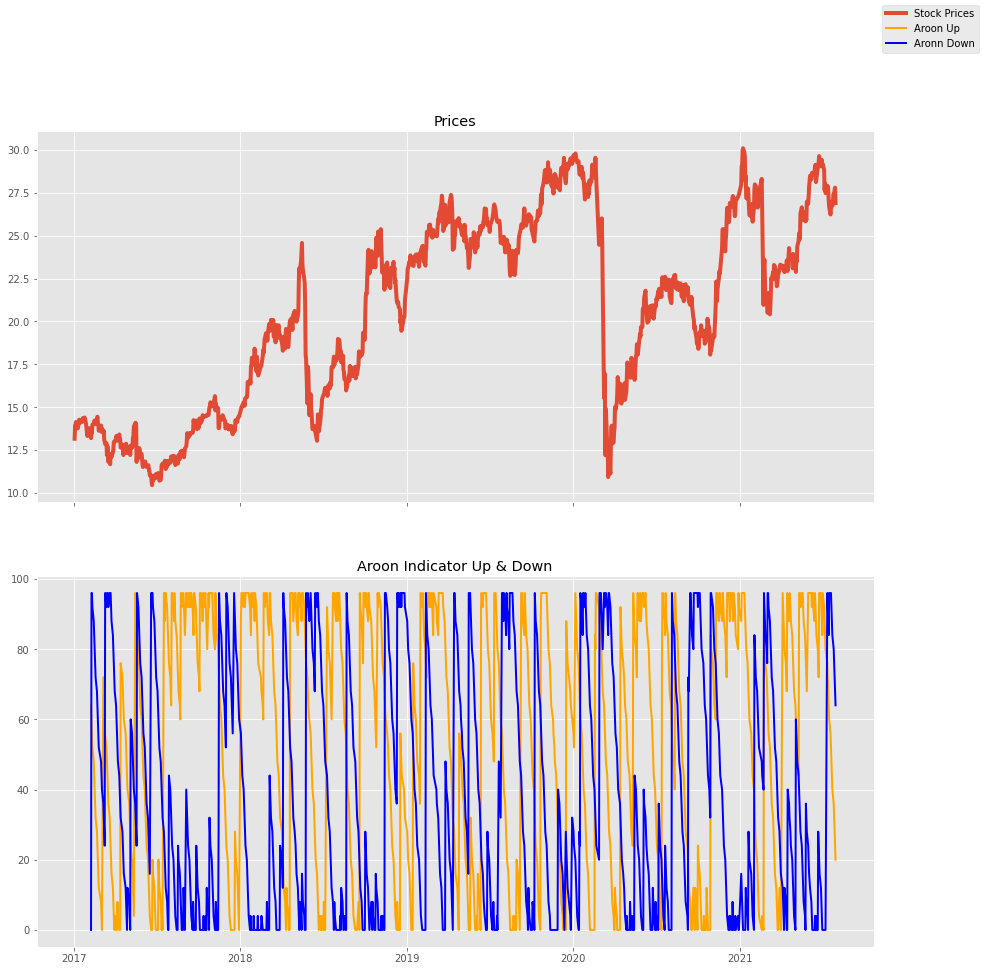

In [2509]:
plt.figure(figsize=(22,8))
fig, ax = plt.subplots(2,1,sharex=True,figsize=(15,15))
ax[0].plot(df["Adj Close"],linewidth=4,label="Stock Prices")
ax[0].set_title("Prices")
ax[1].plot(df_teste["Aroon_Up"],color="orange",linewidth=2,label="Aroon Up")
ax[1].plot(df_teste["Aroon_Down"],color="blue",linewidth=2,label="Aronn Down")
ax[1].set_title("Aroon Indicator Up & Down")
fig.legend()

## Creating Aroon Oscilator

<Figure size 1584x576 with 0 Axes>

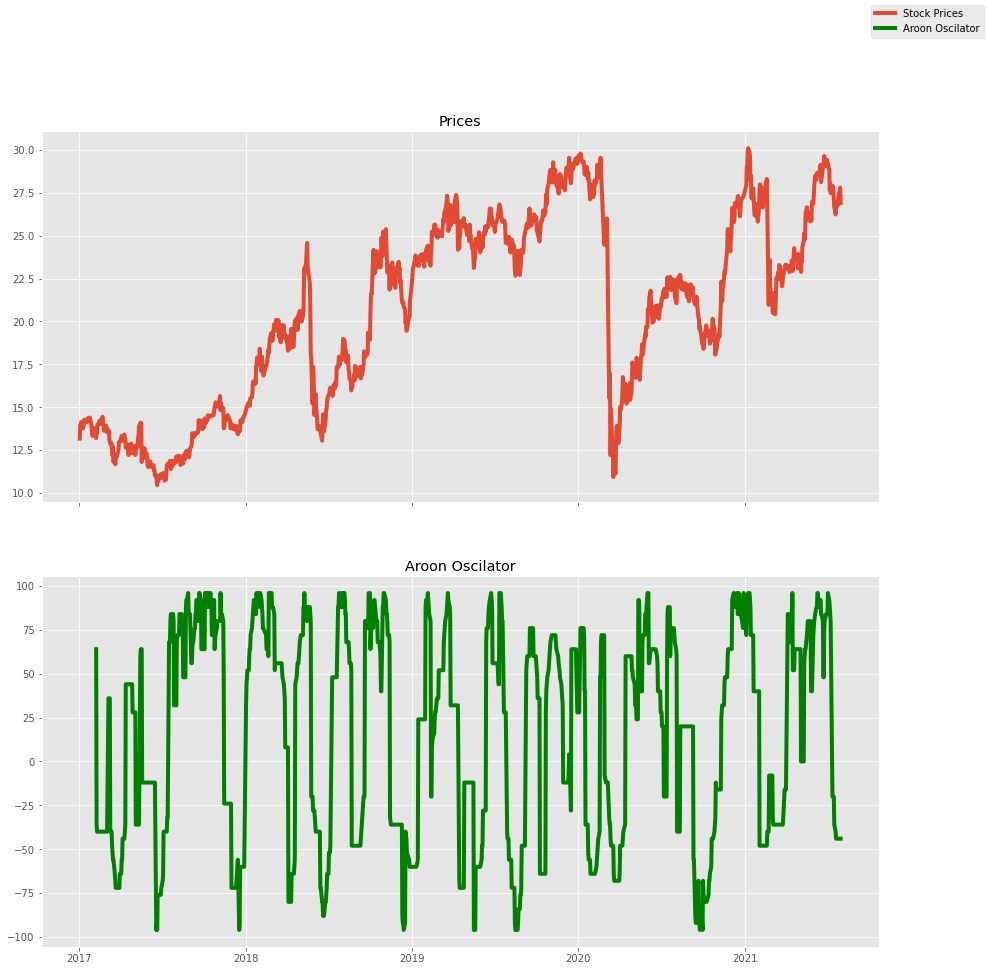

In [2510]:
df["Aroon_Oscilator"]=df_teste["Aroon_Up"]-df_teste["Aroon_Down"]
plt.figure(figsize=(22,8))
fig, ax = plt.subplots(2,1,sharex=True,figsize=(15,15))
ax[0].plot(df["Adj Close"],linewidth=4,label="Stock Prices")
ax[0].set_title("Prices")
ax[1].plot(df["Aroon_Oscilator"],color="green",linewidth=4,label="Aroon Oscilator")
ax[1].set_title("Aroon Oscilator")
fig.legend()

# Defining the conditions

In [2511]:
signal=0
cash=6000
budget=cash
tax=0.01
cash_data=[cash]
df_log=pd.DataFrame()
Buy, Sell = [],[]
for i in range(len(df)):
    if df["Aroon_Oscilator"].iloc[i-1]<0 and df["Aroon_Oscilator"].iloc[i]>0 and signal==0:
        signal+=1
        Buy.append(i)# append signal not execution
        maximo=math.trunc(1*(cash/(df["Open"].iloc[i+1])))
        comission=tax*(df["Open"].iloc[i+1])
        cash-=maximo*(df["Open"].iloc[i+1]-comission)
        cash_data.append(cash)
        a_row=pd.Series(["Buy",df.index[i+1],df["Open"].iloc[i+1],maximo,comission])
        row_df=pd.DataFrame([a_row])
        df_log = pd.concat([row_df, df_log], ignore_index=True)
    if df["Aroon_Oscilator"].iloc[i-1]>0 and df["Aroon_Oscilator"].iloc[i]<0 and signal==1:
        signal=0
        Sell.append(i) # append signal not execution
        comission=tax*(df["Open"].iloc[i+1])
        cash+=maximo*(df["Open"].iloc[i+1]-comission)
        cash_data.append(cash)
        a_row=pd.Series(["Sell",df.index[i+1],df["Open"].iloc[i+1],maximo,comission])
        row_df=pd.DataFrame([a_row])
        df_log = pd.concat([row_df, df_log], ignore_index=True)
df_log=df_log.rename(columns={0:"Type",1:"Date",2:"Price",3:"Shares",4:"Comissions"})
df_log=df_log.set_index("Date")

# Strategy Log

In [2512]:
df_log=df_log.iloc[::-1]
df_log

,Type,Price,Shares,Comissions
Date,,,,
2017-03-07,Buy,15.180000,395,0.1518
2017-03-13,Sell,14.330000,395,0.1433
2017-04-17,Buy,14.140000,400,0.1414
2017-05-08,Sell,14.130000,400,0.1413
2017-05-16,Buy,15.770000,359,0.1577
2017-05-22,Sell,13.350000,359,0.1335
2017-07-18,Buy,13.000000,369,0.1300
2017-11-16,Sell,15.620000,369,0.1562
2018-01-03,Buy,16.490000,349,0.1649


# Closing Opening Positions

In [2513]:
if df_log["Type"].iloc[-1]=="Buy":
    cash+=(df_log.iloc[-1]["Price"]*maximo)+df_log.iloc[-1]["Comissions"]
    cash_data=cash_data[:-1]
    df_log
    Buy=Buy[:-1]
cash

12750.839182348249

# Signal Plot

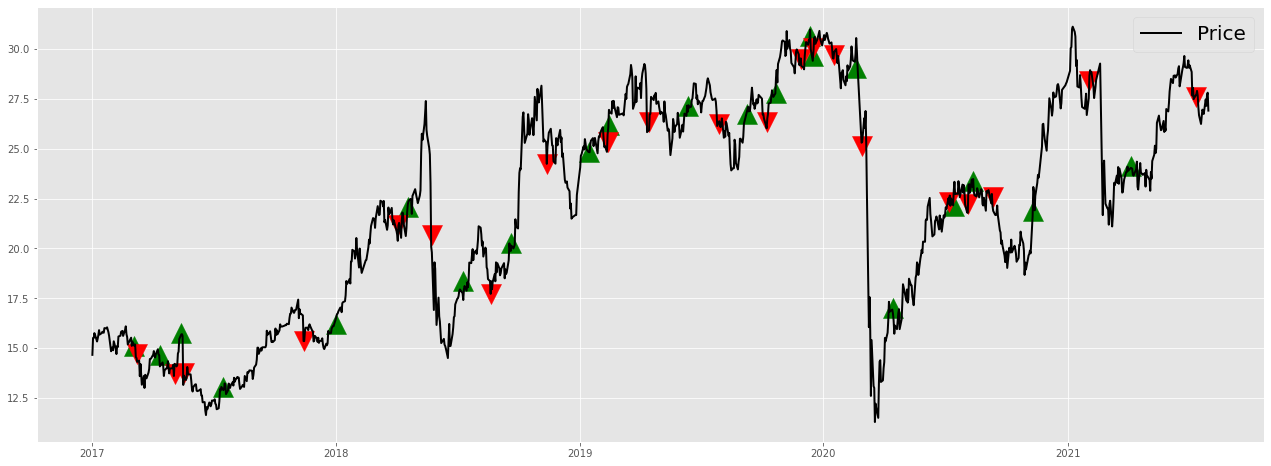

In [2514]:
plt.figure(figsize=(22,8))
plt.scatter(df.iloc[Buy].index,df.iloc[Buy]["Open"],marker="^",color="green",s=400)
plt.scatter(df.iloc[Sell].index,df.iloc[Sell]["Open"],marker="v",color="red",s=400)
plt.plot(df["Close"], label="Price", color="k",linewidth =2)
plt.legend(fontsize=20)
plt.show()
# Marking the signal, the execution will be made in the next day at opening price

# Budget over time

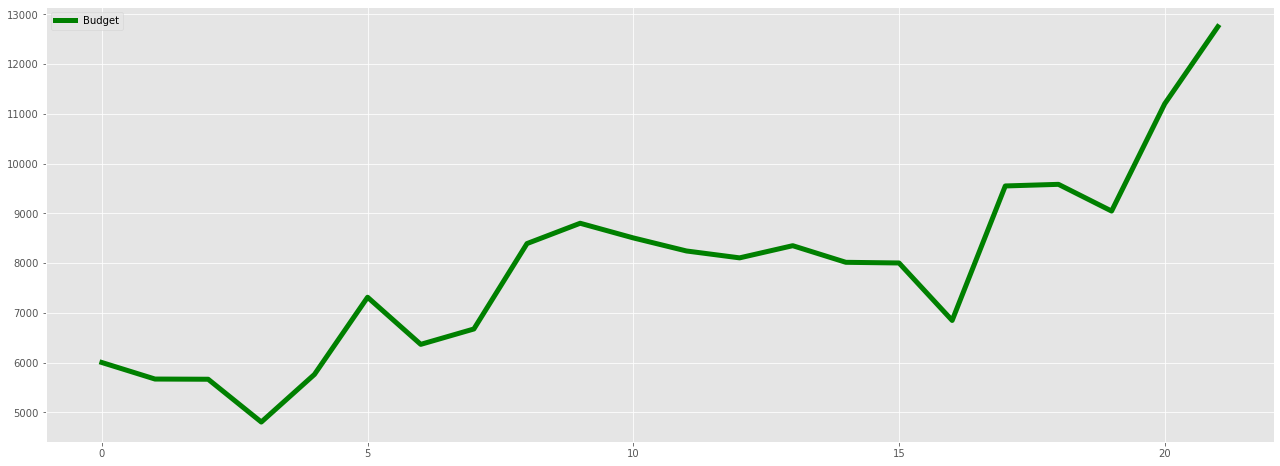

In [2515]:
plt.figure(figsize=(22,8))
cash_data_adjusted=[]
for g in range(len(cash_data)):
    if g%2==0:
        cash_data_adjusted.append(cash_data[g]) # just getting the closing positions results
cash_data=pd.DataFrame(pd.Series(cash_data))
cash_data=cash_data.rename(columns={0:"Budget"})
cash_data_adjusted=pd.DataFrame(pd.Series(cash_data_adjusted))
cash_data_adjusted=cash_data_adjusted.rename(columns={0:"Budget"})
maximum_loss=min(cash_data["Budget"]) # aqui faz sentido eu pegar do cash data, pq ele ta em aberto mesmo
#cash_data_adjusted.plot(title="Budget", color="green",linewidth=3)
plt.plot(cash_data_adjusted, color="green",linewidth=5,label="Budget")
plt.legend()
plt.show()

# Strategy Results

In [2516]:
cash_data_total=[]
cash_data_adjusted=cash_data_adjusted.values.tolist()
loss_data=0
hit=0
trades=0
for p in range(len(cash_data_adjusted)-1):
    if cash_data_adjusted[p]<cash_data_adjusted[p+1]:
        hit+=1
    trades+=1
for h in range(len(cash_data_adjusted)):
    cash_data_total.append(cash_data_adjusted[h][0])
cash_data_total=pd.DataFrame(pd.Series(cash_data_total))
cash_data_total=cash_data_total.rename(columns={0:"Budget"})
cash_data_total

,Budget
0,6000.000000
1,5667.607351
2,5663.647260
3,4803.555033
4,5760.667191
5,7312.007012
6,6364.983112
7,6674.041532
8,8391.137057
9,8799.373865


In [2517]:

loss=0
maximoloss=0
maximogain=0
trade_loss=0
ganho=0
for x in range(len(cash_data_adjusted)-1):
    if cash_data_total["Budget"].iloc[x]>cash_data_total["Budget"].iloc[x+1]:
        loss+=cash_data_total["Budget"].iloc[x+1]-cash_data_total["Budget"].iloc[x]
        perda=cash_data_total["Budget"].iloc[x+1]-cash_data_total["Budget"].iloc[x]
        if perda<maximoloss:
            maximoloss=perda
    else:
        gain=cash_data_total["Budget"].iloc[x+1]-cash_data_total["Budget"].iloc[x]
        if gain>maximogain:
            maximogain=gain
        ganho+=gain  
        trade_loss+=1
cash_data_total


,Budget
0,6000.000000
1,5667.607351
2,5663.647260
3,4803.555033
4,5760.667191
5,7312.007012
6,6364.983112
7,6674.041532
8,8391.137057
9,8799.373865


In [2518]:
B_H=((df["Close"][-1]-df["Close"][0])/df["Close"][0])
retorno=(cash-budget)/budget
print(f"Initial Cash: ${budget}")
print(f"Final Cash: ${cash:.2f}")
print(f"Aaron Strategy: {retorno*100:.2f}%")
print(f"Buy & Hold Strategy: {B_H*100:.2f}%")
#-=--=
print(f"Annual Aroon Return: {((1+retorno)**(252/len(df))-1)*100:.2f}%")
print(f"Annual Buy & Hold Return: {((1+B_H)**(252/len(df))-1)*100:.2f}%")
#-=-=-=
print(f"Maximum Drawdown: {(min(cash_data_adjusted)[0]-budget)/budget*100:.2f}%")
print(f"Hit Ratio: {hit/trades*100:.2f}%")
print(f"Average Gain: ${ganho/trades:.2f}")
print(f"Average Loss: ${loss/trades:.2f}")
print(f"Trades: {trades}")
print(f"Theoretical Risk Reward: {((cash-budget)/trades)/(loss/trade_loss):.2f}")
print(f"Profit Factor: {-maximogain/maximoloss:.2f}")
      

Initial Cash: $6000
Final Cash: $12750.84
Aaron Strategy: 112.51%
Buy & Hold Strategy: 83.56%
Annual Aroon Return: 18.22%
Annual Buy & Hold Return: 14.44%
Maximum Drawdown: -19.94%
Hit Ratio: 47.62%
Average Gain: $553.79
Average Loss: $-232.33
Trades: 21
Theoretical Risk Reward: -0.66
Profit Factor: 2.34
